In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

sns.set()

In [11]:
np.random.uniform(0,1)

0.36698287930567053

In [34]:
# Quadrado com canto superio esquerdo (-3,3) e inferior direito (3, -3)
x_range = np.linspace(-3, 3, 30)
#produto cartesiano
xx, yy = np.meshgrid(x_range, x_range, indexing="ij")

x = []
y = []
for i in range(len(xx)):
    for j in range(len(yy)):
        if np.power(xx[i,j], 2) + np.power(yy[i,j], 2) <= 1:
            y.append((0, 1))
            x.append((xx[i, j], yy[i,j]))
        else:
            if np.random.uniform(0,1) >= 0.3: continue
            y.append((1,0))
            x.append((xx[i, j], yy[i,j]))

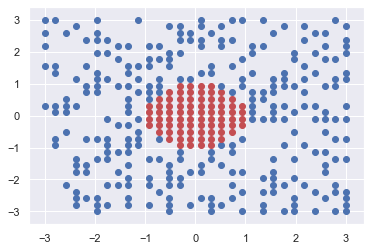

In [35]:
#Exibindo os dados
for i in range(len(x)):
    #print(x[i][0], x[i][1], np.argmax(y[i]))
    c = "b" if np.argmax(y[i]) == 0 else "r"
    plt.scatter(x[i][0], x[i][1], c=c)
plt.show()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_87 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_88 (Dense)             (None, 2)                 8         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.7810
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.7810
Epoch 3/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.7810
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3747 - accu

11/11 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.7810
Epoch 75/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.7810
Epoch 76/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.7810
Epoch 77/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.7810
Epoch 78/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.7810
Epoch 79/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.7810
Epoch 80/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.7810
Epoch 81/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.7810
Epoch 82/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.7810
Epoch 83/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.7810
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.7810
Epoch 155/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.7810
Epoch 156/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.7810
Epoch 157/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.7810
Epoch 158/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.7810
Epoch 159/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.7810
Epoch 160/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.7810
Epoch 161/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.7810
Epoch 162/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.7810
Epoch 163/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 235/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 236/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 237/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 238/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 239/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 240/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 241/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.7810
Epoch 242/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.7810
Epoch 243/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.

11/11 [==============================] - 0s 1ms/step - loss: 0.1874 - accuracy: 0.7810
Epoch 315/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.7810
Epoch 316/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.7810
Epoch 317/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.7810
Epoch 318/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.7810
Epoch 319/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.7810
Epoch 320/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.7810
Epoch 321/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.7810
Epoch 322/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.7810
Epoch 323/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.7810
Epoch 395/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1868 - accuracy: 0.7810
Epoch 396/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.7810
Epoch 397/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.7810
Epoch 398/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.7810
Epoch 399/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.7810
Epoch 400/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.7810
Epoch 401/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.7810
Epoch 402/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.7810
Epoch 403/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.7810
Epoch 475/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.7810
Epoch 476/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 0.7810
Epoch 477/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7810
Epoch 478/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1859 - accuracy: 0.7810
Epoch 479/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.7810
Epoch 480/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.7810
Epoch 481/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1858 - accuracy: 0.7810
Epoch 482/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.7810
Epoch 483/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.7810
Epoch 555/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1847 - accuracy: 0.7810
Epoch 556/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.7810
Epoch 557/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.7810
Epoch 558/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1846 - accuracy: 0.7810
Epoch 559/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.7810
Epoch 560/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.7810
Epoch 561/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.7810
Epoch 562/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.7810
Epoch 563/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.7810
Epoch 635/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.7810
Epoch 636/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.7810
Epoch 637/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.7810
Epoch 638/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.7810
Epoch 639/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.7810
Epoch 640/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.7810
Epoch 641/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.7810
Epoch 642/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.7810
Epoch 643/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.7810
Epoch 715/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1802 - accuracy: 0.7810
Epoch 716/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.7810
Epoch 717/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.7810
Epoch 718/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.7810
Epoch 719/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.7810
Epoch 720/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1800 - accuracy: 0.7810
Epoch 721/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.7810
Epoch 722/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.7810
Epoch 723/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.7810
Epoch 795/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.7810
Epoch 796/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.7810
Epoch 797/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.7810
Epoch 798/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.7810
Epoch 799/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1757 - accuracy: 0.7810
Epoch 800/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.7810
Epoch 801/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.7810
Epoch 802/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.7810
Epoch 803/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.7810
Epoch 875/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.7810
Epoch 876/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.7810
Epoch 877/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.7810
Epoch 878/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.7810
Epoch 879/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.7810
Epoch 880/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.7810
Epoch 881/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.7810
Epoch 882/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.7810
Epoch 883/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.7810
Epoch 955/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1653 - accuracy: 0.7810
Epoch 956/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.7810
Epoch 957/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.7810
Epoch 958/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.7810
Epoch 959/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.7810
Epoch 960/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.7810
Epoch 961/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.7810
Epoch 962/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.7810
Epoch 963/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.

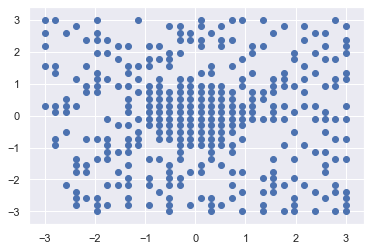

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu")
])

sgd = tf.keras.optimizers.SGD(lr=0.005, momentum=0)
model.compile(
    optimizer=sgd,
    loss='mean_squared_error',
    metrics=['accuracy']
)

model.summary()

_ = model.fit(x, y, epochs=1000)


#Exibindo os dados

y_pred = model.predict(x)
for i in range(len(x)):
    #print(x[i][0], x[i][1], np.argmax(y[i]))
    c = "b" if np.argmax(y_pred[i]) == 0 else "r"
    plt.scatter(x[i][0], x[i][1], c=c)
plt.show()